In [2]:
# Dependencies and Setup
from census import Census
import csv
import hvplot.pandas
import pandas as pd
import requests
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
starter = pd.read_csv('Demographics.csv', delimiter = ",")
#print(starter)

pre_covid = starter [["Year","Status","Origin","Destination","Spending per Visit (dollars)"]]

In [4]:
print(pre_covid.dtypes)

Year                              int64
Status                           object
Origin                           object
Destination                      object
Spending per Visit (dollars)    float64
dtype: object


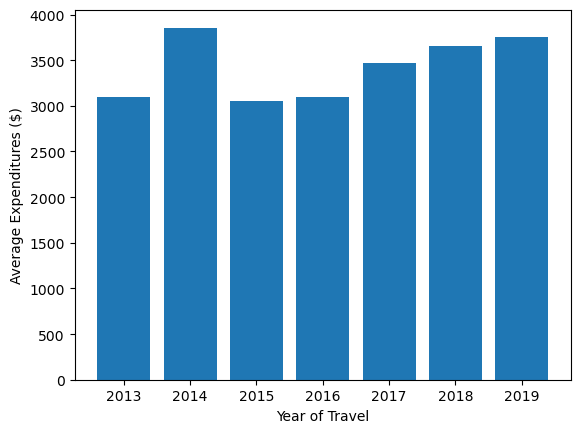

In [5]:
plt.bar(pre_covid["Year"],pre_covid["Spending per Visit (dollars)"])
plt.xlabel("Year of Travel")
plt.ylabel("Average Expenditures ($)")
plt.show()

In [6]:
starter2 = pd.read_csv('Totalvisits.csv')
#print(starter2)

totalvisits_df = starter2[["Year", "Ontario","Other Canada","US","Overseas"]]
#print(totalvisits_df)

tv_df = totalvisits_df.dropna()
tv_df

,Year,Ontario,Other Canada,US,Overseas
0,1998,"91,718","5,532","30,214","2,181"
1,1999,"94,522","5,719","30,082","2,174"
2,2000,"95,756","5,792","29,108","2,424"
3,2001,"95,757","5,853","28,153","2,176"
4,2002,"97,982","5,947","26,344","2,054"
5,2003,"91,207","5,489","22,012","1,606"
6,2004,"100,120","5,963","21,412","2,112"
7,2005,"103,424","6,158","19,348","2,229"
8,2006,"105,722","6,426","17,445","2,274"
9,2007,"109,589","6,670","15,069","2,243"


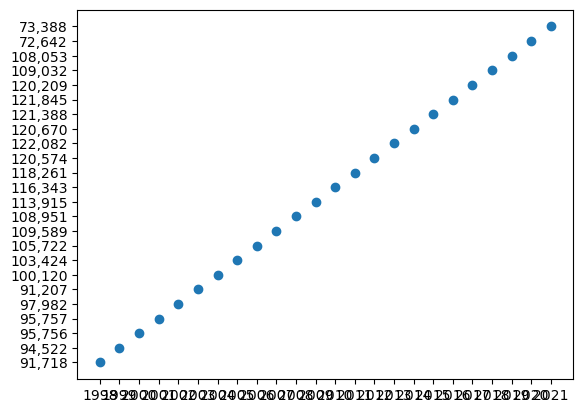

In [10]:
#tv_df["Year"] = tv_df.loc(tv_df["Year"] > 2017)
plt.scatter(tv_df["Year"], tv_df["Ontario"])

In [16]:
starter3 = pd.read_csv('accommodations.csv')
starter3 = starter3.dropna()
print(starter3)

   Distribution of sales  total sales  \
0                   2017          100   
1                   2018          100   
2                   2019          100   
3                   2020          100   
4                   2021          100   

   Room or unit accommodation for travellers  \
0                                       70.3   
1                                       70.1   
2                                       70.2   
3                                       67.7   
4                                       69.4   

   Meals and non-alcoholic beverages  Alcoholic beverages  \
0                               11.9                  5.2   
1                               11.9                  5.1   
2                               12.2                  5.0   
3                               10.4                  5.0   
4                                9.8                  4.7   

    Sale of merchandise  Telephone and Internet access services,  \
0                   1.5      

In [19]:
print(starter3.dtypes)

Distribution of sales                          int64
total sales                                    int64
Room or unit accommodation for travellers    float64
Meals and non-alcoholic beverages            float64
Alcoholic beverages                          float64
 Sale of merchandise                         float64
Telephone and Internet access services,      float64
Rental of space and equipment                float64
Amusement and recreational services          float64
Other services                               float64
Other revenue                                float64
dtype: object


In [21]:
accom_df = starter3.copy()
accom_df["Distribution of sales"] = accom_df["Distribution of sales"].astype(int)
print(accom_df)

   Distribution of sales  total sales  \
0                   2017          100   
1                   2018          100   
2                   2019          100   
3                   2020          100   
4                   2021          100   

   Room or unit accommodation for travellers  \
0                                       70.3   
1                                       70.1   
2                                       70.2   
3                                       67.7   
4                                       69.4   

   Meals and non-alcoholic beverages  Alcoholic beverages  \
0                               11.9                  5.2   
1                               11.9                  5.1   
2                               12.2                  5.0   
3                               10.4                  5.0   
4                                9.8                  4.7   

    Sale of merchandise  Telephone and Internet access services,  \
0                   1.5      

<BarContainer object of 5 artists>

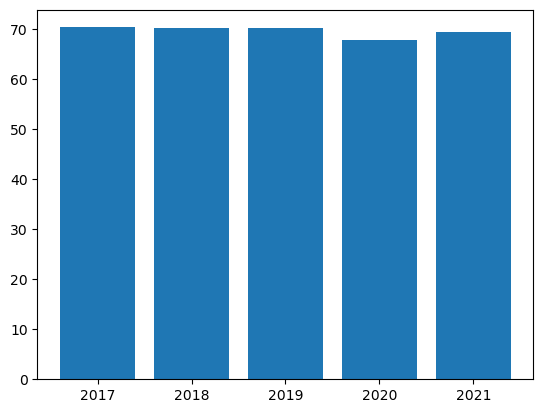

In [22]:
plt.bar(starter3["Distribution of sales"],starter3["Room or unit accommodation for travellers"])